In [109]:
# Bibliotecas Gerais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [147]:
# Ler dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [148]:
## CODIGO DE TESTE ##


# Função para dividir o nome do file e extrair informações
def extract_features_from_filename(filename):
    parts = filename.split('_')

    def clean_coordinate(coordinate):
        """Remove hyphens and convert to float if possible."""
        clean_coord = coordinate.replace('-', '')
        try:
            return float(clean_coord)
        except ValueError:
            return clean_coord


    if len(parts) == 11:
        coordinates_id1 = clean_coordinate(parts[4])
        coordinates_id2 = clean_coordinate(parts[5])
        date_time_acquisition_start = parts[8].replace('T', '')
        date_time_acquisition_end = parts[9].replace('T', '')
        return pd.Series([coordinates_id1, coordinates_id2, date_time_acquisition_start, date_time_acquisition_end], 
                         index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

    if len(parts) == 10:
        coordinates_id1 = clean_coordinate(parts[3])
        coordinates_id2 = clean_coordinate(parts[4])
        date_time_acquisition_start = parts[7].replace('T', '')
        date_time_acquisition_end = parts[8].replace('T', '')
        return pd.Series([coordinates_id1, coordinates_id2, date_time_acquisition_start, date_time_acquisition_end], 
                         index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

    if len(parts) == 9:
        coordinates_id1 = clean_coordinate(parts[2])
        coordinates_id2 = clean_coordinate(parts[3])
        date_time_acquisition_start = parts[6].replace('T', '')
        date_time_acquisition_end = parts[7].replace('T', '')
        return pd.Series([coordinates_id1, coordinates_id2, date_time_acquisition_start, date_time_acquisition_end], 
                         index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

    if len(parts) == 8:
        coordinates_id1 = clean_coordinate(parts[1])
        coordinates_id2 = clean_coordinate(parts[2])
        date_time_acquisition_start = parts[5].replace('T', '')
        date_time_acquisition_end = parts[6].replace('T', '')
        return pd.Series([coordinates_id1, coordinates_id2, date_time_acquisition_start, date_time_acquisition_end], 
                         index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

    return pd.Series([None]*4, index=['coordinates_id1', 'coordinates_id2', 'date_time_acquisition_start', 'date_time_acquisition_end'])

# Aplicar a função a cada nome de arquivo no dataset
file_features = train_data['file_name_l1'].apply(extract_features_from_filename)
file_features_test = test_data['file_name_l1'].apply(extract_features_from_filename)

# Concatenar as novas features ao dataframe original

train_data = pd.concat([train_data, file_features], axis=1)
test_data = pd.concat([test_data, file_features_test], axis=1)


In [149]:

# Remover colunas 'id' e 'file_name_l1'

train_data = train_data.drop(columns=['id', 'file_name_l1'])
test_data = test_data.drop(columns=['file_name_l1'])

In [151]:

# Estatísticas descritivas
print("Estatísticas Descritivas do Dataset de Treino:")
desc_stats = train_data.describe()
print(desc_stats.to_string())
print("\n")

# Verificar valores nulos
print("Verificar Missing Data:")
missing_data = train_data.isnull().sum()
print(missing_data.to_string())


Estatísticas Descritivas do Dataset COMPLETO de Treino:
          elevation         ozone           NO2       azimuth        zenith  incidence_azimuth  incidence_zenith     value_550  coordinates_id1  coordinates_id2
count  10438.000000  10438.000000  10438.000000  10438.000000  10438.000000       10438.000000      10438.000000  10438.000000     1.043800e+04     1.043800e+04
mean     417.992240    317.283388      0.226330    148.246685     43.553870         191.787363          6.088504      0.143846     2.359460e+07     3.621300e+07
std      671.904367     39.412705      0.101593     33.901711     15.653371          78.862966          2.490754      0.165720     2.582994e+07     4.428080e+07
min      -32.000000    237.000000      0.054000     18.700000      7.000000          96.700000          2.500000      0.010000     1.350000e+02     4.400000e+01
25%       51.000000    288.000000      0.171000    137.100000     30.200000         106.000000          3.600000      0.055000     4.871160

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


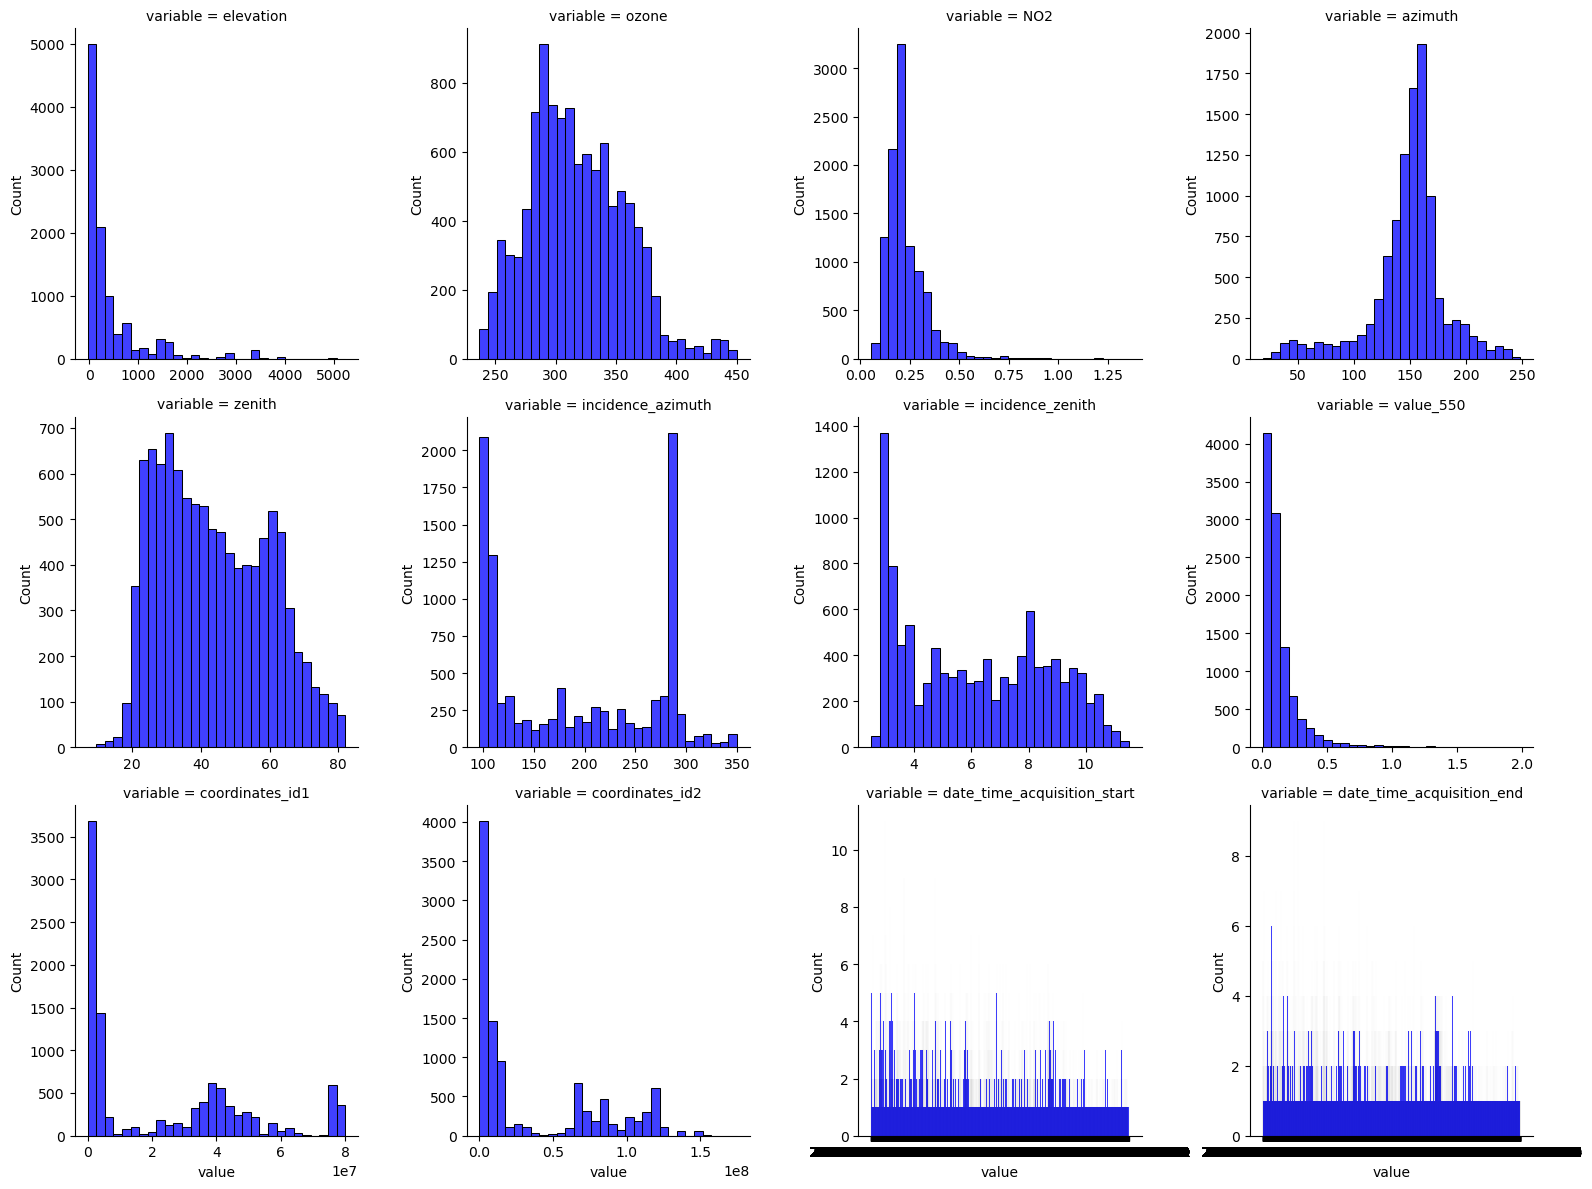

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: Horizontal orientation requires numeric `x` variable.

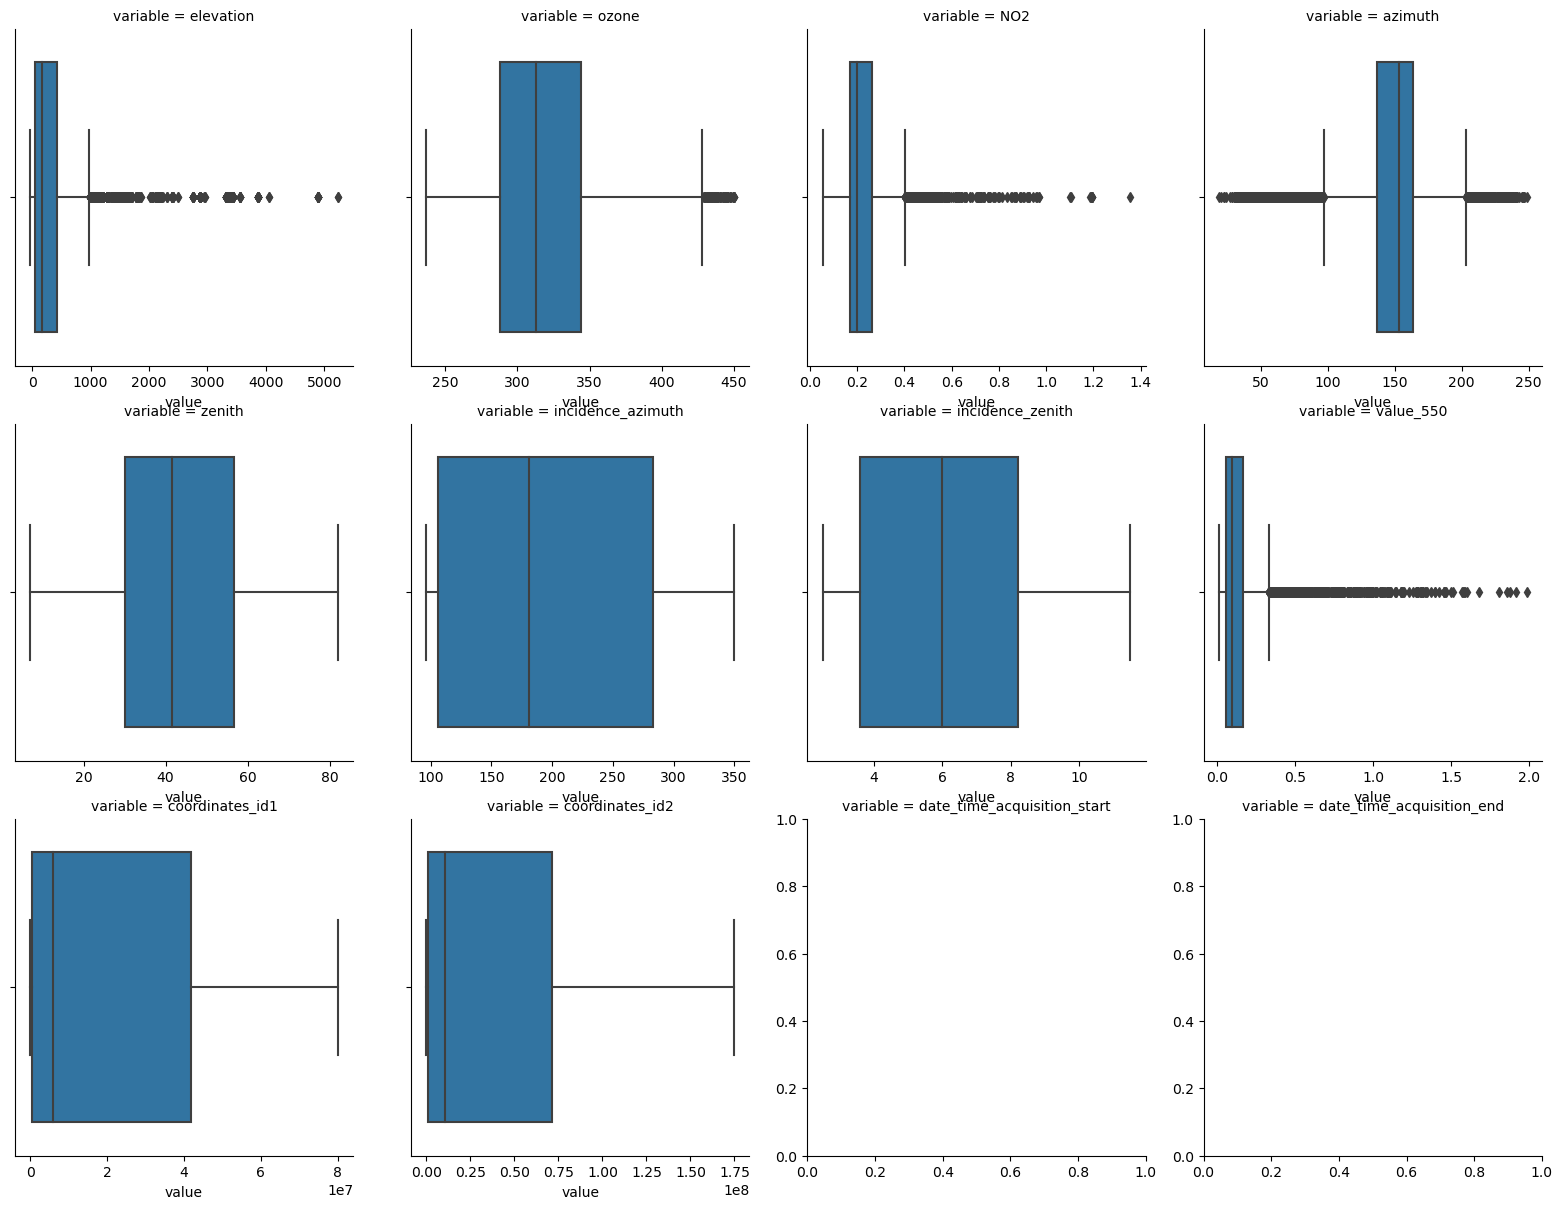

In [152]:
# Graficos e Visualizações

#Visualizar a distribuição normal das features
df_analise_dist = train_data.melt()

#Histograma para cada feature do DataSet
g = sns.FacetGrid(df_analise_dist, col="variable", col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "value", kde=False, color='blue', bins=30)
plt.show()


#Visualizar a distribuição de outliers
df_analise_box_plot = train_data.melt()

#FaceGrit com os box Plot
g = sns.FacetGrid(df_analise_box_plot, col="variable", col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.boxplot, "value")
plt.show()
        

# Visualizações (dependendo do tipo de dados, ajuste as visualizações)
sns.pairplot(train_data)
plt.show()

In [153]:
# Traino e Validation Set´s
X = train_data.drop(columns=['value_550'])
y = train_data['value_550']

# Dividir os dados de treino completos em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)


# Standardizar as features dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.7334 - mae: 0.8435 - val_loss: 0.4948 - val_mae: 0.0887
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0031 - mae: 0.5562 - val_loss: 0.5051 - val_mae: 0.1568
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8302 - mae: 0.4563 - val_loss: 0.5120 - val_mae: 0.1778
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7668 - mae: 0.4093 - val_loss: 0.5214 - val_mae: 0.2017
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6909 - mae: 0.3529 - val_loss: 0.5173 - val_mae: 0.1924
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6609 - mae: 0.3307 - val_loss: 0.5058 - val_mae: 0.1642
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6315 - mae: 0.3007 - val_loss: 0.4999 - val_mae: 0.1522
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6018 - mae: 0.2751 - val_loss: 0.4922 - val_mae: 0.1287
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5

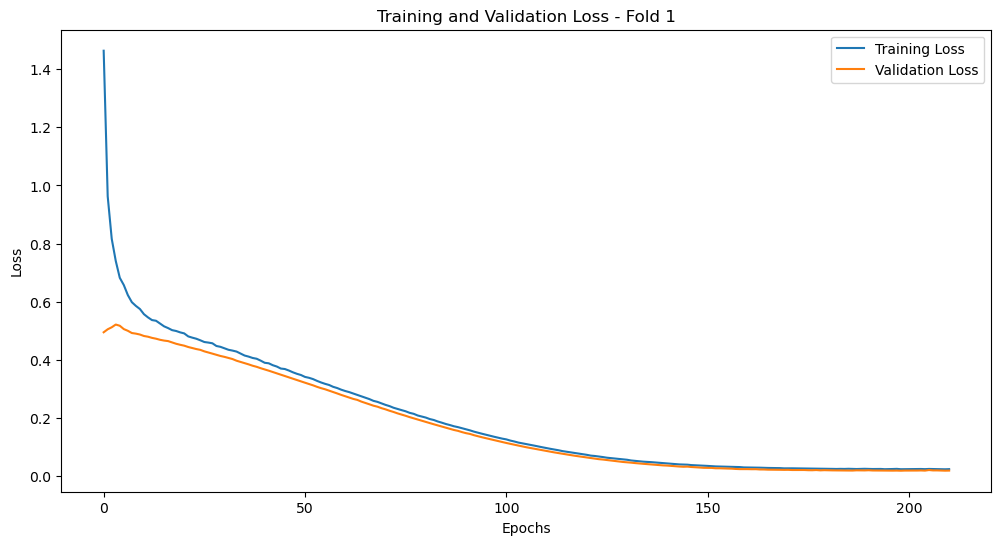

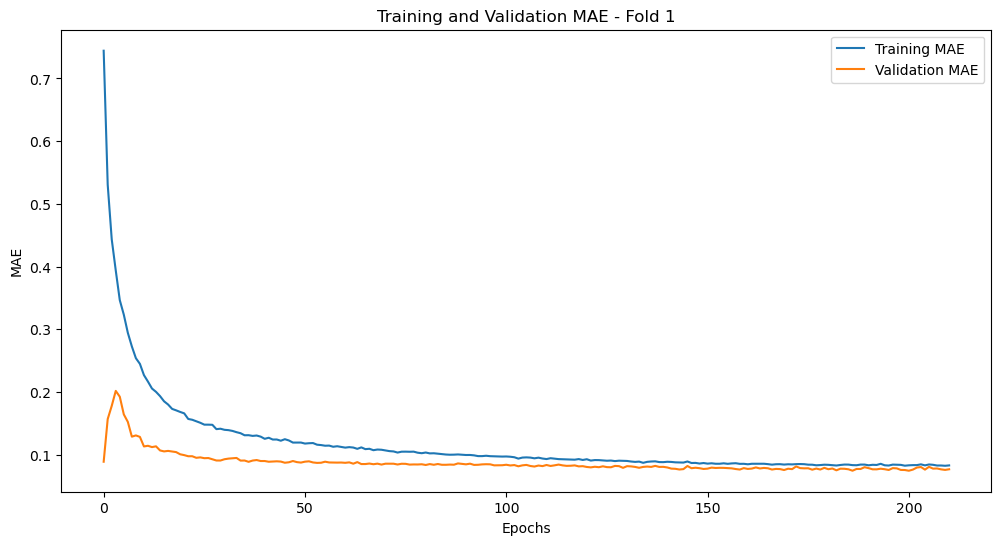

Fold Validation MAE: 0.07556386291980743
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.7822 - mae: 0.8807 - val_loss: 0.5055 - val_mae: 0.0899
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0285 - mae: 0.5741 - val_loss: 0.5043 - val_mae: 0.1010
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8622 - mae: 0.4789 - val_loss: 0.5056 - val_mae: 0.1185
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7835 - mae: 0.4267 - val_loss: 0.5045 - val_mae: 0.1100
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7068 - mae: 0.3775 - val_loss: 0.5044 - val_mae: 0.1251
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6737 - mae: 0.3452 - val_loss: 0.5024 - val_mae: 0.1167
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6472 - mae: 0.3237 - val_loss: 0.5008 - val_mae: 0.1178
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6242 - mae: 0.3010 - val_loss: 0.4984 - val_mae: 0.1172
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5962 - mae: 0.

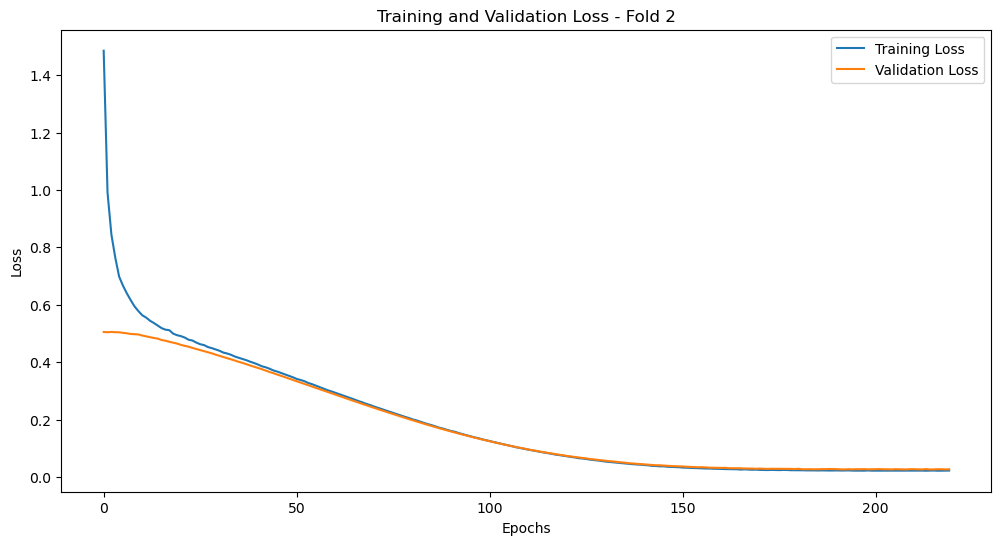

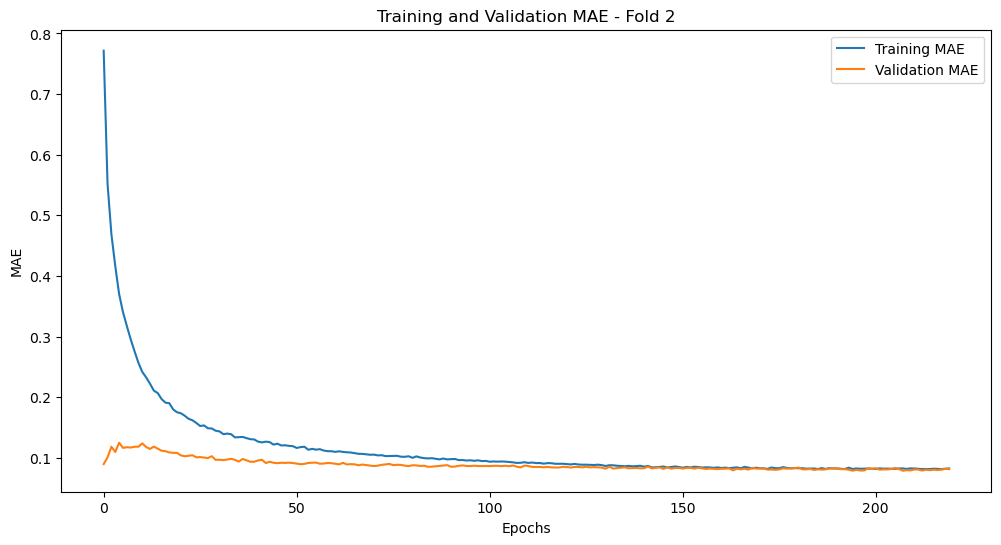

Fold Validation MAE: 0.0818239152431488
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.8565 - mae: 0.8973 - val_loss: 0.5117 - val_mae: 0.1061
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0547 - mae: 0.5765 - val_loss: 0.5171 - val_mae: 0.1259
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8671 - mae: 0.4843 - val_loss: 0.5121 - val_mae: 0.1139
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7867 - mae: 0.4287 - val_loss: 0.5151 - val_mae: 0.1283
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7267 - mae: 0.3831 - val_loss: 0.5159 - val_mae: 0.1348
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6793 - mae: 0.3449 - val_loss: 0.5128 - val_mae: 0.1322
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6534 - mae: 0.3214 - val_loss: 0.5063 - val_mae: 0.1205
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6151 - mae: 0.2896 - val_loss: 0.5044 - val_mae: 0.1222
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6082 - mae: 0.

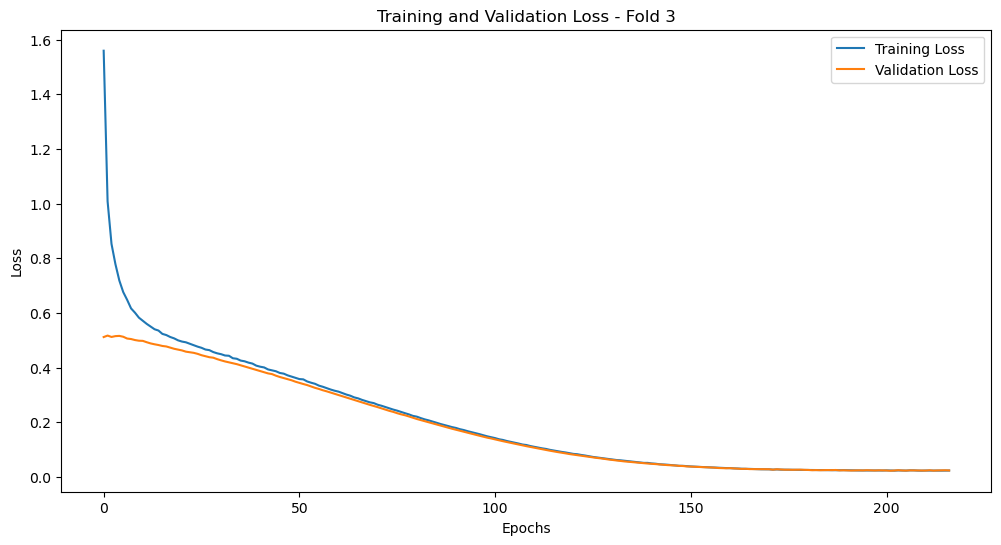

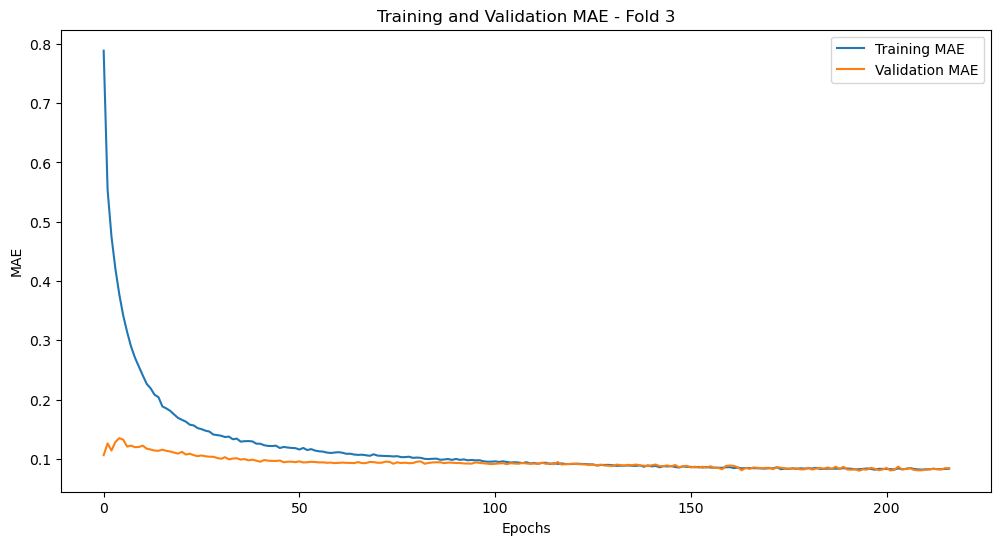

Fold Validation MAE: 0.08027607202529907
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.6442 - mae: 0.8203 - val_loss: 0.5156 - val_mae: 0.0989
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9546 - mae: 0.5259 - val_loss: 0.5136 - val_mae: 0.1043
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8170 - mae: 0.4449 - val_loss: 0.5121 - val_mae: 0.1026
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7514 - mae: 0.3994 - val_loss: 0.5105 - val_mae: 0.1023
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6875 - mae: 0.3484 - val_loss: 0.5098 - val_mae: 0.1067
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6581 - mae: 0.3230 - val_loss: 0.5072 - val_mae: 0.1139
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6360 - mae: 0.3033 - val_loss: 0.5105 - val_mae: 0.1252
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6081 - mae: 0.2781 - val_loss: 0.5066 - val_mae: 0.1208
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5894 - mae: 0.

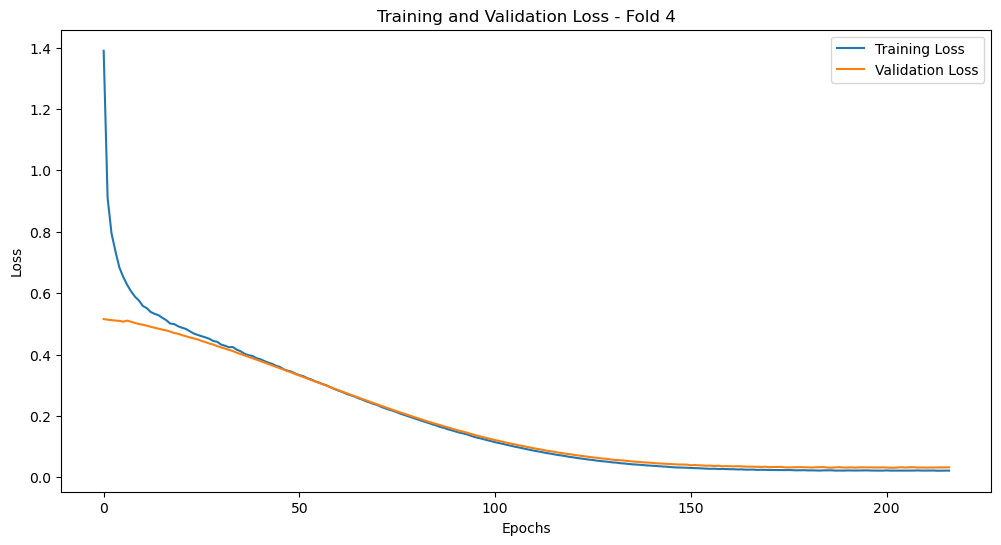

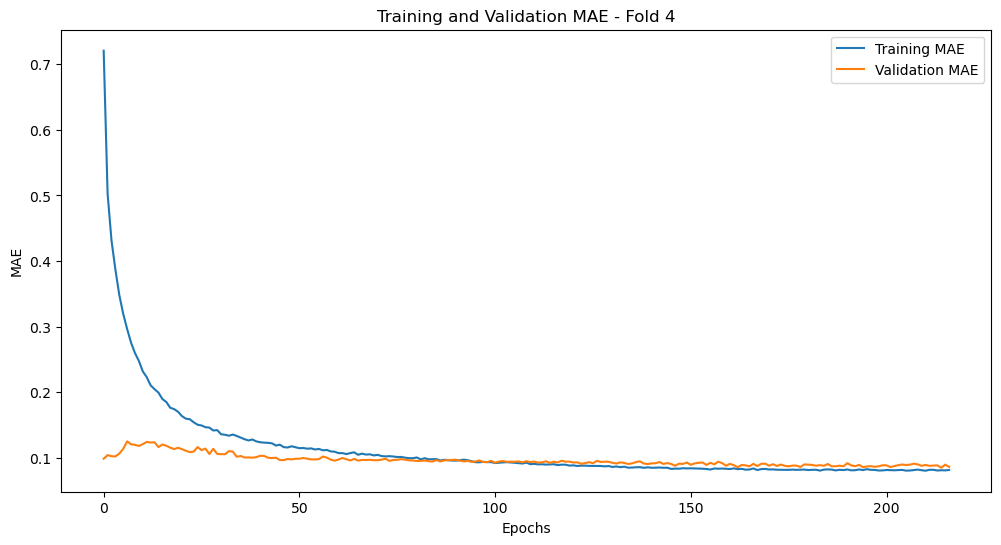

Fold Validation MAE: 0.0861486941576004
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.7980 - mae: 0.8683 - val_loss: 0.4992 - val_mae: 0.1154
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9947 - mae: 0.5571 - val_loss: 0.5192 - val_mae: 0.1914
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8240 - mae: 0.4519 - val_loss: 0.5171 - val_mae: 0.1878
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7526 - mae: 0.4048 - val_loss: 0.5233 - val_mae: 0.2050
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7148 - mae: 0.3761 - val_loss: 0.5106 - val_mae: 0.1740
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6649 - mae: 0.3390 - val_loss: 0.5131 - val_mae: 0.1833
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6383 - mae: 0.3114 - val_loss: 0.5029 - val_mae: 0.1534
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6144 - mae: 0.2913 - val_loss: 0.5002 - val_mae: 0.1478
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6016 - mae: 0.

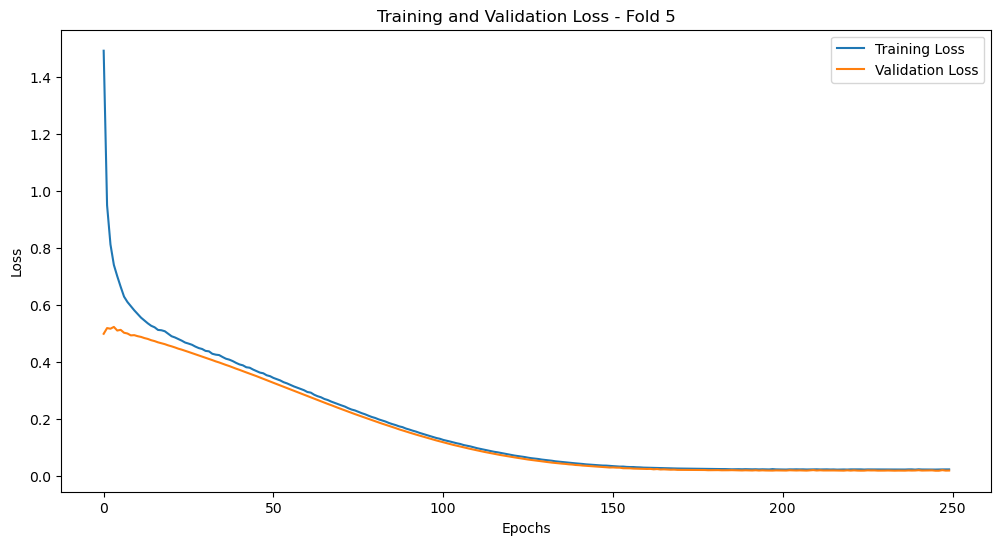

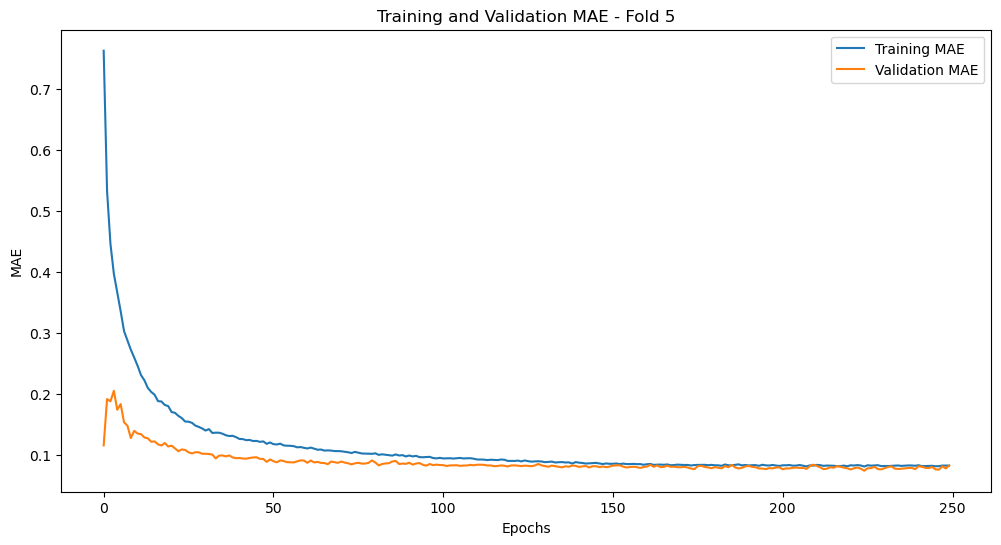

Fold Validation MAE: 0.07612243294715881
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 2.0722 - mae: 0.9451 - val_loss: 0.5145 - val_mae: 0.1043
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1452 - mae: 0.6247 - val_loss: 0.5100 - val_mae: 0.1025
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9379 - mae: 0.5230 - val_loss: 0.5151 - val_mae: 0.1110
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8305 - mae: 0.4552 - val_loss: 0.5119 - val_mae: 0.1100
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7746 - mae: 0.4219 - val_loss: 0.5137 - val_mae: 0.1178
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7089 - mae: 0.3671 - val_loss: 0.5131 - val_mae: 0.1236
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6655 - mae: 0.3322 - val_loss: 0.5105 - val_mae: 0.1268
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6548 - mae: 0.3202 - val_loss: 0.5106 - val_mae: 0.1307
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6232 - mae: 0.

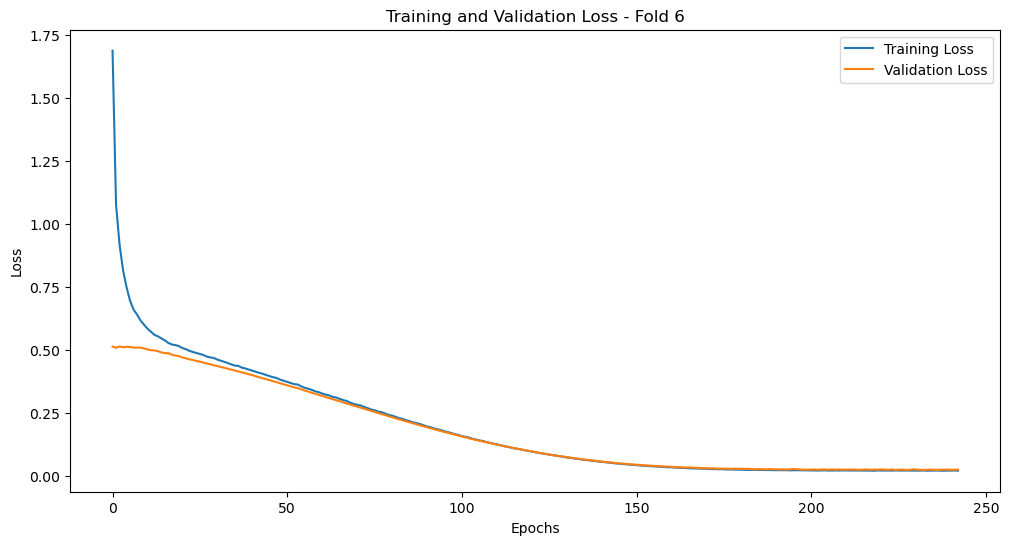

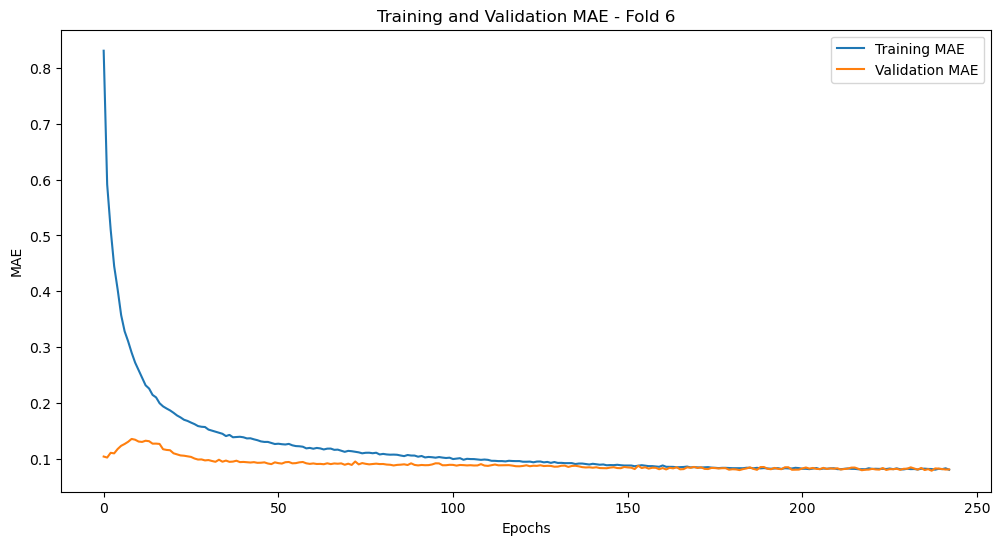

Fold Validation MAE: 0.0824679359793663
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.8268 - mae: 0.8617 - val_loss: 0.5006 - val_mae: 0.0935
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0145 - mae: 0.5604 - val_loss: 0.5016 - val_mae: 0.1163
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8795 - mae: 0.4751 - val_loss: 0.5029 - val_mae: 0.1261
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7408 - mae: 0.4012 - val_loss: 0.5025 - val_mae: 0.1291
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6884 - mae: 0.3552 - val_loss: 0.5031 - val_mae: 0.1331
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6537 - mae: 0.3271 - val_loss: 0.5033 - val_mae: 0.1355
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6284 - mae: 0.2997 - val_loss: 0.5042 - val_mae: 0.1500
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6050 - mae: 0.2795 - val_loss: 0.5001 - val_mae: 0.1313
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5817 - mae: 0.

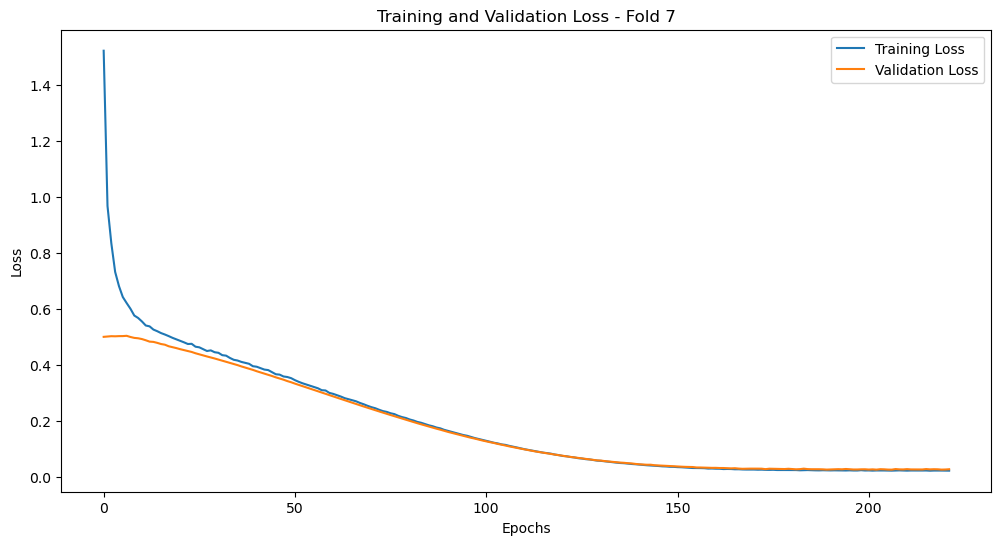

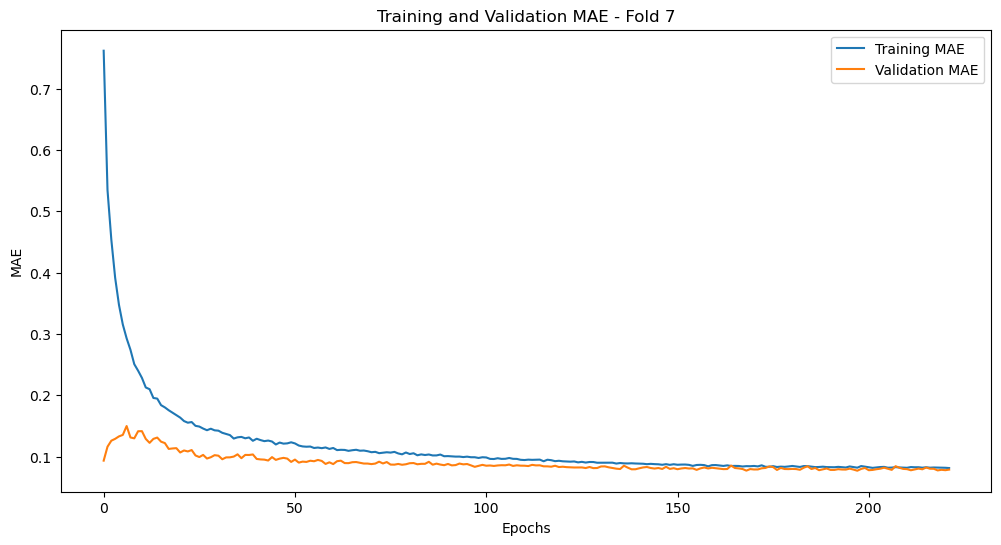

Fold Validation MAE: 0.0785345509648323
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 2.2917 - mae: 1.0386 - val_loss: 0.5061 - val_mae: 0.0982
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2078 - mae: 0.6626 - val_loss: 0.5076 - val_mae: 0.1006
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0036 - mae: 0.5655 - val_loss: 0.5162 - val_mae: 0.1216
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9070 - mae: 0.5144 - val_loss: 0.5224 - val_mae: 0.1415
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8380 - mae: 0.4634 - val_loss: 0.5171 - val_mae: 0.1346
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7700 - mae: 0.4200 - val_loss: 0.5257 - val_mae: 0.1579
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7358 - mae: 0.3906 - val_loss: 0.5167 - val_mae: 0.1425
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6960 - mae: 0.3631 - val_loss: 0.5182 - val_mae: 0.1485
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6766 - mae: 0.

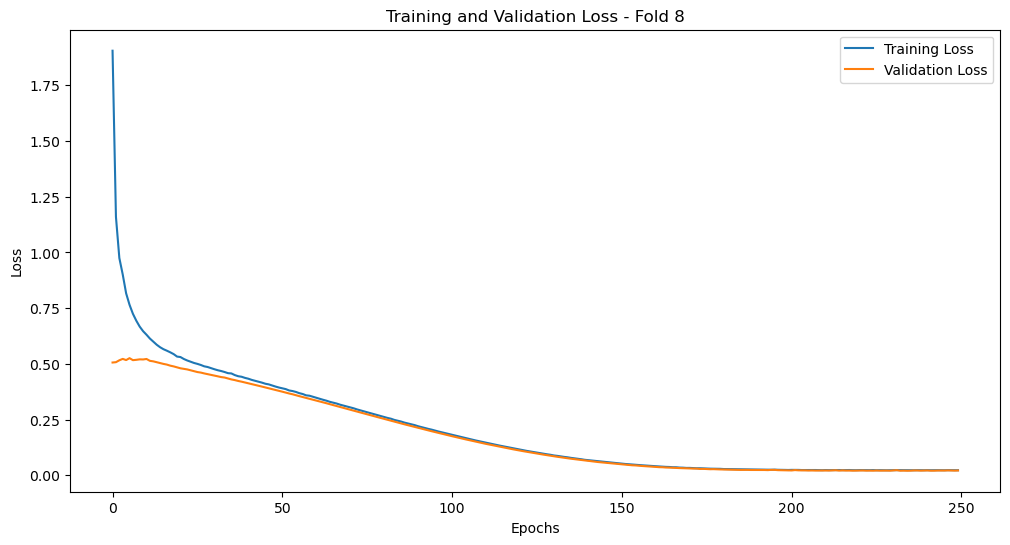

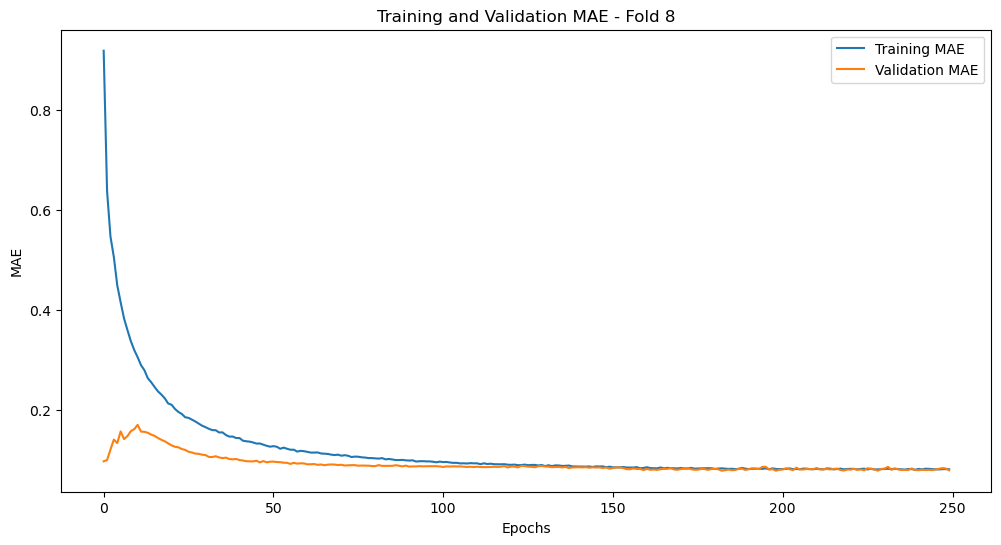

Fold Validation MAE: 0.0820893943309784
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.7819 - mae: 0.8773 - val_loss: 0.4952 - val_mae: 0.0884
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0989 - mae: 0.6070 - val_loss: 0.4945 - val_mae: 0.0994
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9322 - mae: 0.5214 - val_loss: 0.4997 - val_mae: 0.1301
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8149 - mae: 0.4480 - val_loss: 0.4976 - val_mae: 0.1225
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7459 - mae: 0.3989 - val_loss: 0.4975 - val_mae: 0.1243
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7112 - mae: 0.3694 - val_loss: 0.4957 - val_mae: 0.1197
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6805 - mae: 0.3510 - val_loss: 0.4945 - val_mae: 0.1215
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6457 - mae: 0.3193 - val_loss: 0.4931 - val_mae: 0.1222
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6255 - mae: 0

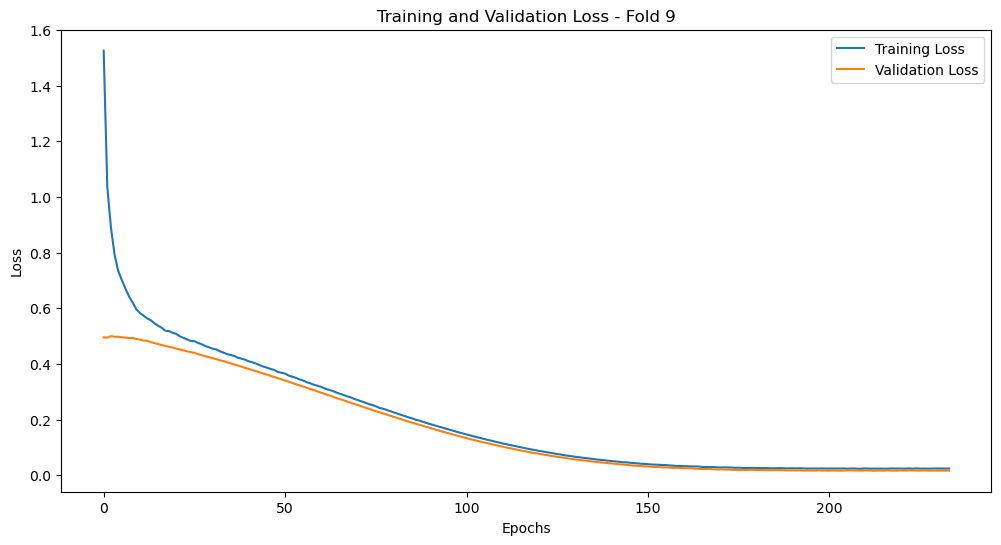

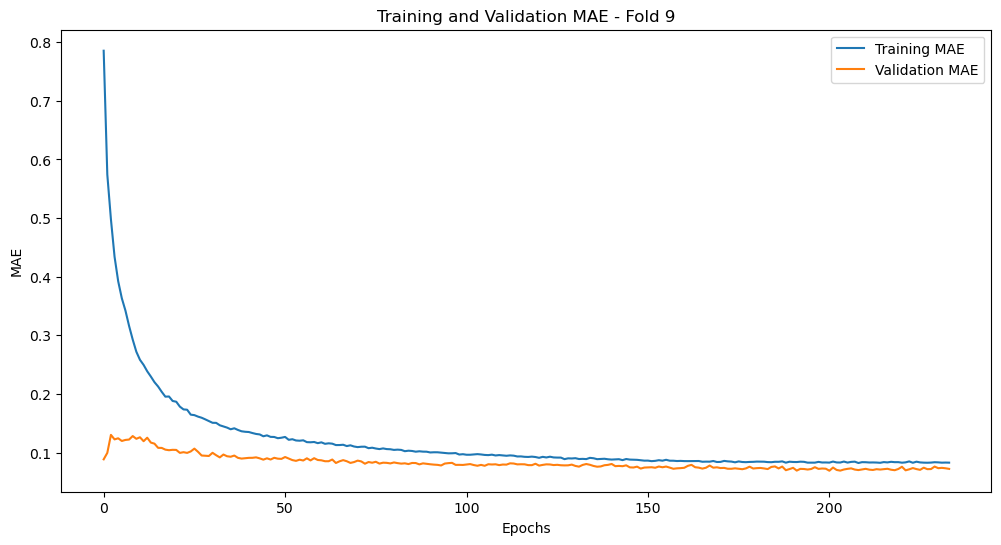

Fold Validation MAE: 0.06988166272640228
Epoch 1/250


C:\Users\Jojo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 2.4562 - mae: 1.0313 - val_loss: 0.5064 - val_mae: 0.1066
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1542 - mae: 0.6349 - val_loss: 0.5122 - val_mae: 0.1447
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9648 - mae: 0.5373 - val_loss: 0.5131 - val_mae: 0.1488
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8624 - mae: 0.4736 - val_loss: 0.5214 - val_mae: 0.1760
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8097 - mae: 0.4405 - val_loss: 0.5141 - val_mae: 0.1444
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7465 - mae: 0.3943 - val_loss: 0.5143 - val_mae: 0.1445
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7097 - mae: 0.3696 - val_loss: 0.5147 - val_mae: 0.1407
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6837 - mae: 0.3469 - val_loss: 0.5131 - val_mae: 0.1425
Epoch 9/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6592 - mae: 0.

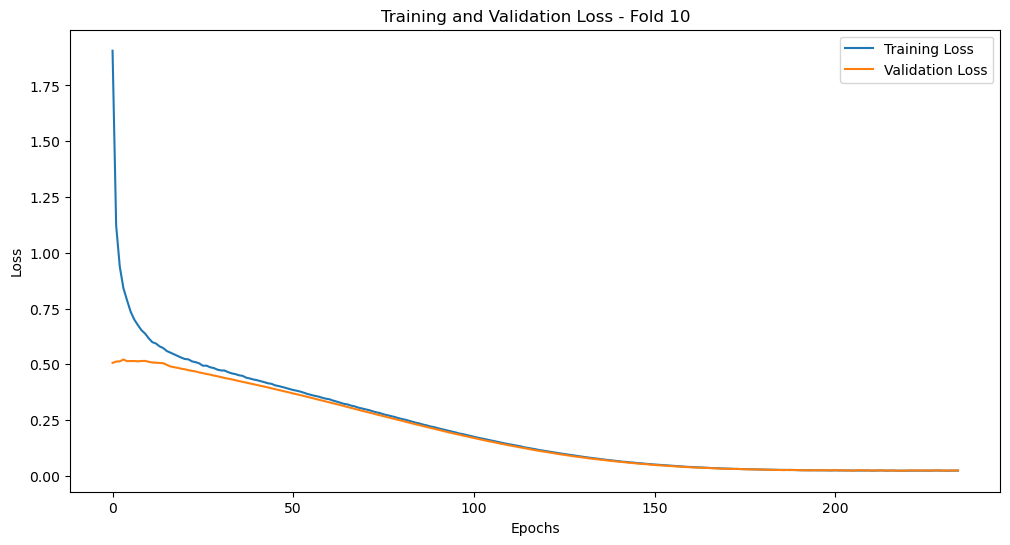

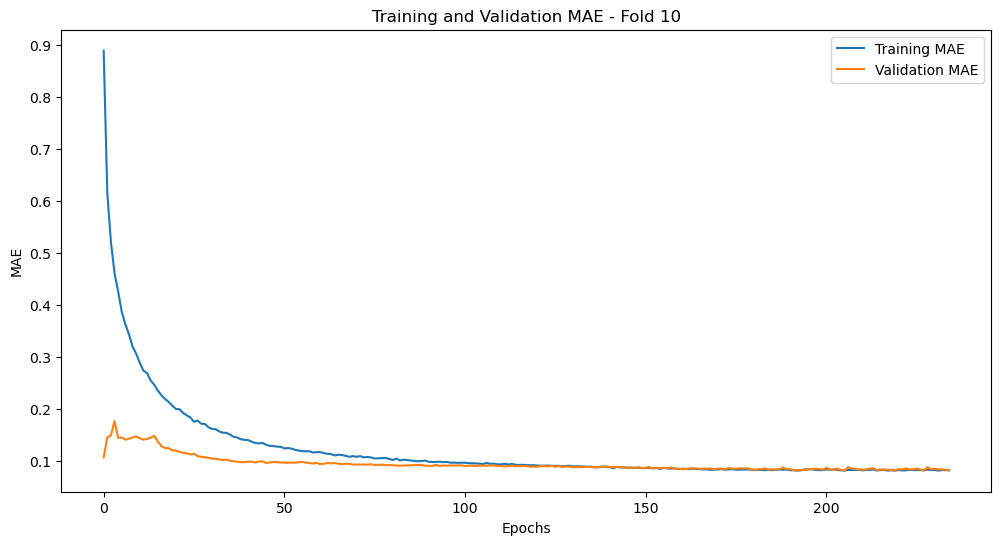

Fold Validation MAE: 0.08166022598743439

Mean Validation MAE: 0.07945687472820281
Standard Deviation of Validation MAE: 0.004367095457060935


In [154]:
# Criação do modelo

def create_model():
    model = Sequential([
        Dense(200, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.002), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(100, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(100, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.256),
        Dense(100, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.125),
        Dense(100, activation=LeakyReLU(negative_slope=0.01), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.072),
        Dense(50, activation='relu'),
        BatchNormalization(),
        Dropout(0.025),
        Dense(1) 
    ])


    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=10)


val_mae_scores = []

# Loop para cada fold
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    model = create_model()

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    # Trainar o modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=250, batch_size=256, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], verbose=1)

    # Plotting do training and validation loss para cada fold
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - Fold {len(val_mae_scores) + 1}')
    plt.legend()
    plt.show()

    # Plotting do training and validation MAE para cada fold
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title(f'Training and Validation MAE - Fold {len(val_mae_scores) + 1}')
    plt.legend()
    plt.show()

    # Avaliar o modelo no conjunto de validação
    val_loss, val_mae = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_mae_scores.append(val_mae)
    print(f"Fold Validation MAE: {val_mae}")

# Calcular a média e desvio padrão dos scores de validação
mean_val_mae = np.mean(val_mae_scores)
std_val_mae = np.std(val_mae_scores)

print(f"\nMean Validation MAE: {mean_val_mae}")
print(f"Standard Deviation of Validation MAE: {std_val_mae}")


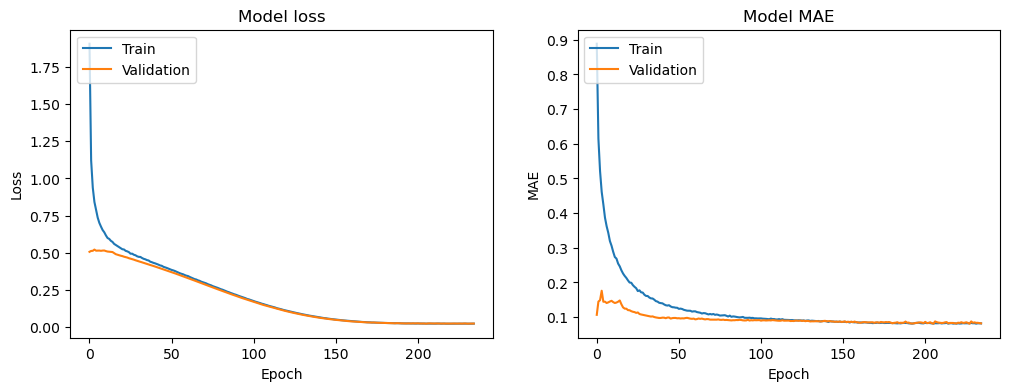

In [155]:
# Plot dos scores de loss e MAE

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [156]:
# Standardizar os dados de teste para fazer previsões
test_data_scaled = scaler.transform(test_data.drop(columns=['id']))


In [157]:
# Gerar prediçoes
predictions = model.predict(test_data_scaled)

# Preparar submisao em csv
submission = pd.DataFrame({
    'id': test_data['id'],
    'value_550': predictions.flatten()
})


submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Submission file created successfully!


In [ ]:
## CODIGO DE TESTE ##

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np


## CODIGO DE TESTE ##

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the function to create your Keras model
def create_model(optimizer='adam', 
                 kernel_regularizer_1=0.0001, 
                 kernel_regularizer_2=0.001, 
                 kernel_regularizer_3=0.01, 
                 dropout_rate_1=0.5, 
                 dropout_rate_2=0.5, 
                 dropout_rate_3=0.2):
    model = Sequential([
        Dense(1280, activation='relu', kernel_regularizer=l2(kernel_regularizer_1), input_shape=(X_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate_1),
        Dense(640, activation='relu', kernel_regularizer=l2(kernel_regularizer_2)),
        BatchNormalization(),
        Dropout(dropout_rate_2),
        Dense(320, activation='relu', kernel_regularizer=l2(kernel_regularizer_3)),
        BatchNormalization(),
        Dropout(dropout_rate_3),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Create a KerasRegressor based on your Keras model
model = KerasRegressor(model=create_model, epochs=300, batch_size=32, verbose=0)

# Define the grid search parameters with correct prefixes
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__kernel_regularizer_1': [0.0001, 0.001, 0.01],
    'model__kernel_regularizer_2': [0.0001, 0.001, 0.01],
    'model__kernel_regularizer_3': [0.0001, 0.001, 0.01],
    'model__dropout_rate_1': [0.3, 0.5, 0.7],
    'model__dropout_rate_2': [0.3, 0.5, 0.7],
    'model__dropout_rate_3': [0.2, 0.4, 0.6]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_result = grid_search.fit(X_scaled, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
